# Healthcare: Heart Attack Prediction

In [39]:
# from google.colab import drive
# drive.mount('/content/drive')

# Introduction

## Data Dictionary

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

- Value 0: normal  

- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

**Vietnamese sub**

Tuổi (Age): Đây là tuổi của bệnh nhân, tức là số tuổi của họ.

Giới tính (Sex): Đây là giới tính của bệnh nhân, có thể là nam (1) hoặc nữ (0).

Exang (Exercise Induced Angina): Chỉ số này cho biết liệu bệnh nhân có bị đau tim khi tập thể dục không. Nếu có (1), nếu không (0).

Ca (Number of Major Vessels): Đây là số lượng mạch máu lớn trong tim của bệnh nhân. Nó có thể là 0, 1, 2 hoặc 3.

Cp (Chest Pain Type): Đây là loại đau ngực mà bệnh nhân trải qua. Có bốn giá trị khác nhau:

- Giá trị 1: Đau ngực cổ điển (typical angina).  
- Giá trị 2: Đau ngực không cổ điển (atypical angina).
- Giá trị 3: Đau ngực không liên quan đến tim (non-anginal pain).
- Giá trị 4: Không có triệu chứng (asymptomatic).
Trtbps (Resting Blood Pressure): Đây là áp lực máu tĩnh của bệnh nhân khi nghỉ (đo bằng mm Hg).

Chol (Cholesterol): Đây là mức cholesterol trong máu của bệnh nhân, được đo bằng mg/dl thông qua cảm biến BMI.

Fbs (Fasting Blood Sugar): Chỉ số này cho biết mức đường huyết (đường trong máu) sau khi ăn kiêng. Nếu đường huyết nhanh hơn 120 mg/dl, thì giá trị là 1, nếu không, giá trị là 0.

Rest ECG (Resting Electrocardiographic Results): Kết quả điện tâm đồ trong tình trạng nghỉ của bệnh nhân. Có ba giá trị khác nhau:

- Giá trị 0: Bình thường (normal).
- Giá trị 1: Có biểu hiện của ST-T bất thường (biến đổi sóng T và/hoặc tăng hoặc giảm ST > 0.05 mV).
- Giá trị 2: Hiện tượng tăng trái tim bên trái có khả năng hoặc chắc chắn theo tiêu chuẩn của Estes (probable or definite left ventricular hypertrophy by Estes' criteria).
Thalach (Maximum Heart Rate Achieved): Đây là tốc độ tim tối đa mà bệnh nhân đạt được trong quá trình kiểm tra.

Mục tiêu (Target): Đây là mục tiêu của việc phân tích, cho biết khả năng bị đau tim. Giá trị 0 thường ám chỉ khả năng thấp hơn của việc bị đau tim, trong khi giá trị 1 ám chỉ khả năng cao hơn của việc bị đau tim.

Những chỉ số này được sử dụng trong nghiên cứu về sức khỏe để dự đoán nguy cơ mắc bệnh tim và quản lý bệnh tim.

## Task
- To perform EDA and predict a person is prone to a heart attack or not

# Preparation

## Libaries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read csv data file

### Show the first 5 rows of the dataset

In [41]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
df = pd.read_csv("C:\TDAK\HEART ATTACK PREDICTION\Dataset\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


## Understanding data

### The shape and info of dataset

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [43]:
df.shape

(303, 14)

In [44]:
id0 = df[df['output']==0].shape[0]
id1 = df.shape[0] - id0
ratio0 = id0/df.shape[0]
ratio1 = id1/df.shape[0]
print(f'The percentage of people without heart attack to all is {ratio0*100:.2f} %')
print(f'The percentage of people with heart attack to all is {ratio1*100:.2f} %')

The percentage of people without heart attack to all is 45.54 %
The percentage of people with heart attack to all is 54.46 %


In [45]:
# Find dupllcated row
duplicates = df[df.duplicated()]
duplicates

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1


In [46]:
# remove duplicate rows
df = df.drop_duplicates()
df.shape

(302, 14)

### Checking the number of unique values in each column

In [47]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].nunique()
pd.DataFrame(dict, index=['Unique']).T

,Unique
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


### Separating the col in cat and num

In [48]:
num_col = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
output_col = ['output']
print ('The numerical columns are:', num_col)
print ('The categorical columns are:', cat_col)
print ('The target columns are:', output_col)

The numerical columns are: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The categorical columns are: ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
The target columns are: ['output']


### Checking the missing values

In [49]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Summary statistics

In [50]:
df[num_col].describe()

,age,trtbps,chol,thalachh,oldpeak
count,302.00,302.00,302.00,302.00,302.00
mean,54.42,131.60,246.50,149.57,1.04
std,9.05,17.56,51.75,22.90,1.16
min,29.00,94.00,126.00,71.00,0.00
25%,48.00,120.00,211.00,133.25,0.00
50%,55.50,130.00,240.50,152.50,0.80
75%,61.00,140.00,274.75,166.00,1.60
max,77.00,200.00,564.00,202.00,6.20


- Fbs is mostly negative with a mean of 0.14 meaning that is a feature may not be valuable for making predictions -> don't take feature 'fbs'
- Exng is mostly negative, may have less significance as a feature for prediction model -> don't take feature 'exng'

## Exploratory Data Analysis

### Univariate Analysis

#### Count plot of cat features

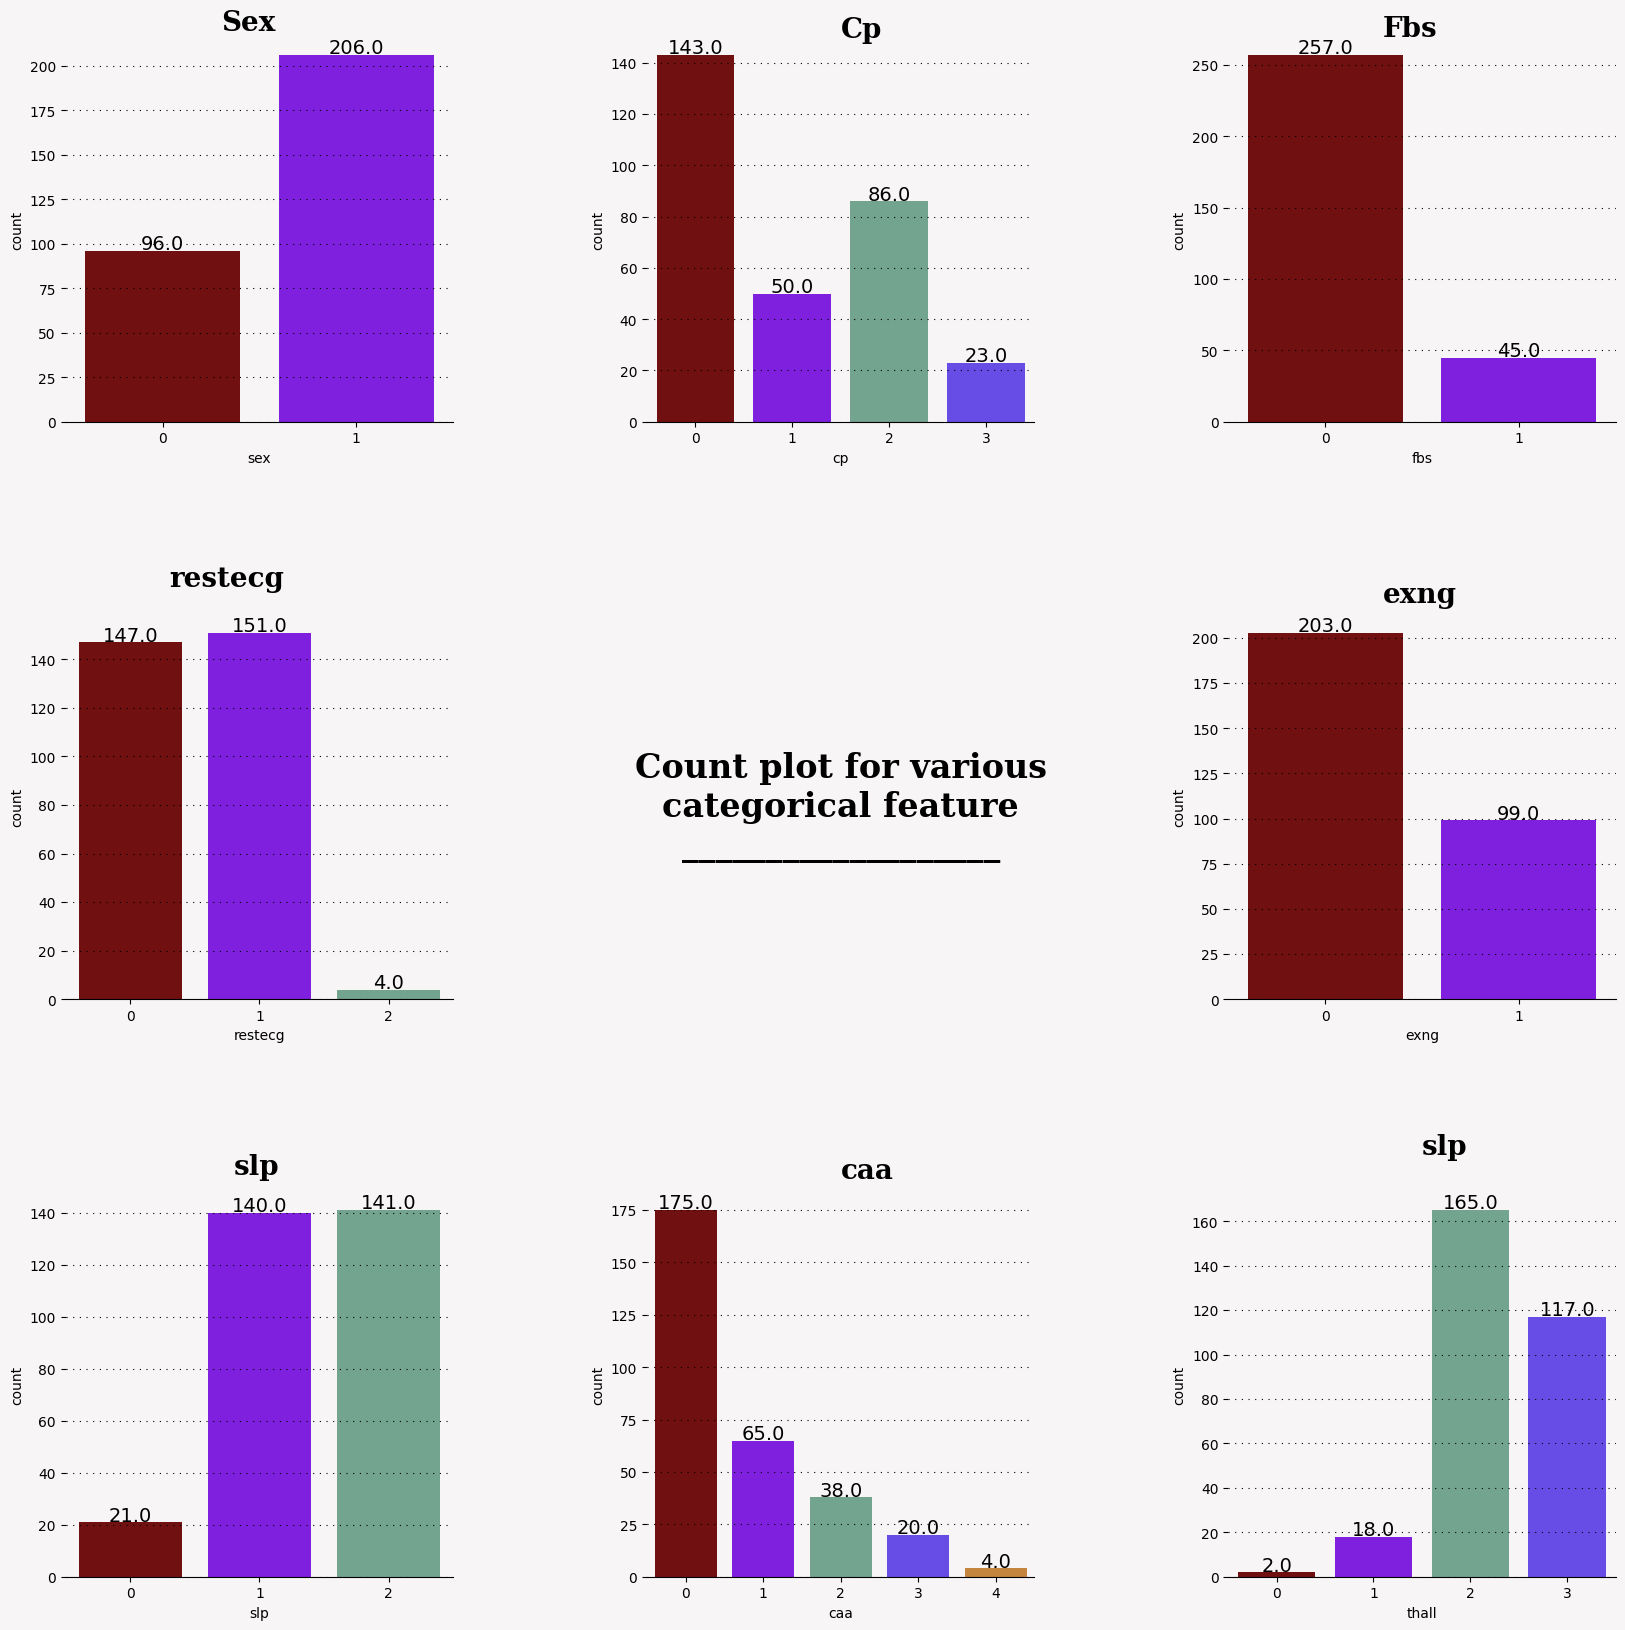

In [51]:
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

bg_color = '#f7f5f5'
color_palette = ['#800000', '#8000ff', '#6aac90', '#5833ff', '#da8829']
fig.patch.set_facecolor(bg_color)
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)
ax2.set_facecolor(bg_color)
ax3.set_facecolor(bg_color)
ax4.set_facecolor(bg_color)
ax5.set_facecolor(bg_color)
ax6.set_facecolor(bg_color)
ax7.set_facecolor(bg_color)
ax8.set_facecolor(bg_color)

# Title of the plot
ax4.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.5,
         'Count plot for various\ncategorical feature\n___________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=24,
         fontweight='bold',
         fontfamily='serif',
         color='#000000')

# Sex count
ax0.text(0.3, 220,'Sex', fontsize=20, fontfamily='serif', fontweight='bold', color='#000000')
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_xlabel("")
ax0.set_ylabel("")
sns.countplot(ax=ax0,data=df,x='sex',palette=color_palette)
for p in ax0.patches:
    ax0.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

# Cp count
ax1.text(1.5, 150,'Cp', fontsize=20, fontfamily='serif', fontweight='bold', color='#000000')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_xlabel("")
ax1.set_ylabel("")
sns.countplot(ax=ax1,data=df,x='cp',palette=color_palette)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

# Fbs count
ax2.text(0.3, 270,'Fbs', fontsize=20, fontfamily='serif', fontweight='bold', color='#000000')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.set_xlabel("")
ax2.set_ylabel("")
sns.countplot(ax=ax2,data=df,x='fbs',palette=color_palette)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

# restecg count
ax3.text(0.3, 170,'restecg', fontsize=20, fontfamily='serif', fontweight='bold', color='#000000')
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.set_xlabel("")
ax3.set_ylabel("")
sns.countplot(ax=ax3,data=df,x='restecg',palette=color_palette)
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

# exng count
ax5.text(0.3, 220,'exng', fontsize=20, fontfamily='serif', fontweight='bold', color='#000000')
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.set_xlabel("")
ax5.set_ylabel("")
sns.countplot(ax=ax5,data=df,x='exng',palette=color_palette)
for p in ax5.patches:
    ax5.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

# slp count
ax6.text(0.8, 155,'slp', fontsize=20, fontfamily='serif', fontweight='bold', color='#000000')
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax6.set_xlabel("")
ax6.set_ylabel("")
sns.countplot(ax=ax6,data=df,x='slp',palette=color_palette)
for p in ax6.patches:
    ax6.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

# caa count
ax7.text(2, 190,'caa', fontsize=20, fontfamily='serif', fontweight='bold', color='#000000')
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax7.set_xlabel("")
ax7.set_ylabel("")
sns.countplot(ax=ax7,data=df,x='caa',palette=color_palette)
for p in ax7.patches:
    ax7.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

# thall count
ax8.text(1.5, 190,'slp', fontsize=20, fontfamily='serif', fontweight='bold', color='#000000')
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.set_xlabel("")
ax8.set_ylabel("")
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
for p in ax8.patches:
    ax8.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

#### Boxplot of num features

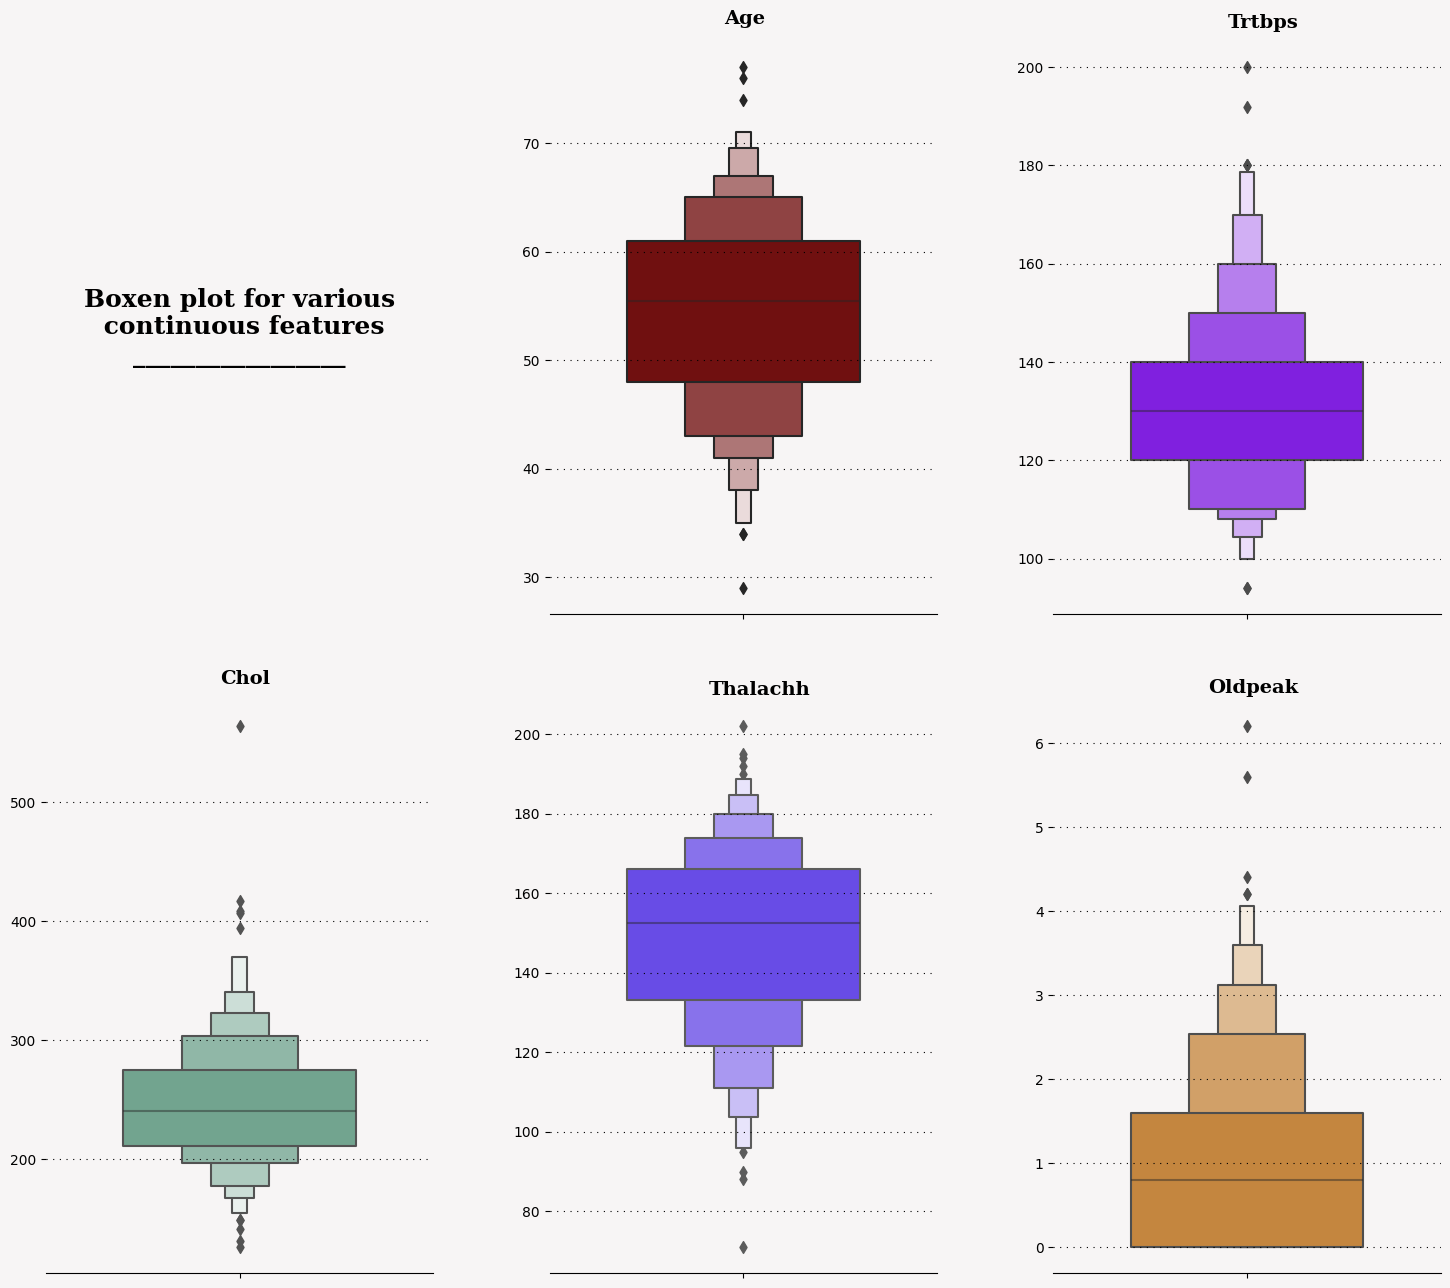

In [52]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

bg_color = '#f7f5f5'
color_palette = ['#800000', '#8000ff', '#6aac90', '#5833ff', '#da8829']
fig.patch.set_facecolor(bg_color)
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)
ax2.set_facecolor(bg_color)
ax3.set_facecolor(bg_color)
ax4.set_facecolor(bg_color)
ax5.set_facecolor(bg_color)


# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

#### Count plot of output

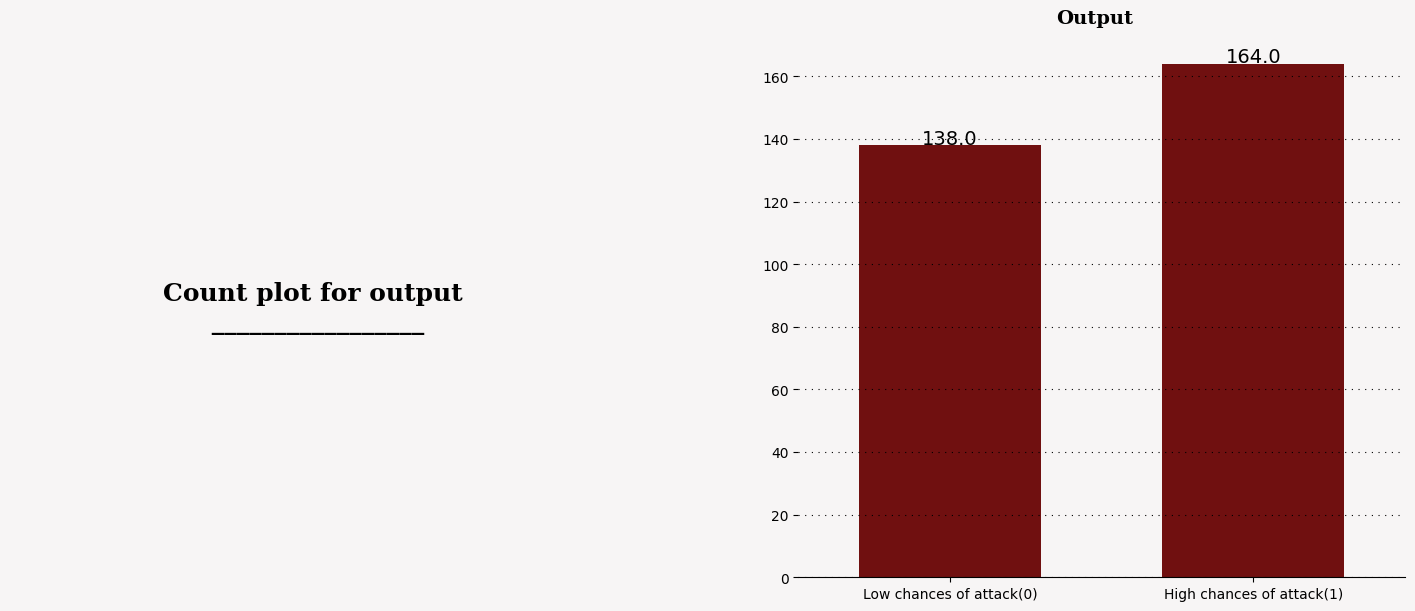

In [53]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

bg_color = '#f7f5f5'
color_palette = ['#800000', '#8000ff', '#6aac90', '#5833ff', '#da8829']
fig.patch.set_facecolor(bg_color)
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for output\n _________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Output
ax1.text(0.35, 177, 'Output', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,x=df['output'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)

### Bivariate analysis

#### Correlation matrix of num features

In [54]:
df_corr = df[num_col].corr()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.00,0.28,0.21,-0.40,0.21
trtbps,0.28,1.00,0.13,-0.05,0.19
chol,0.21,0.13,1.00,-0.01,0.05
thalachh,-0.40,-0.05,-0.01,1.00,-0.34
oldpeak,0.21,0.19,0.05,-0.34,1.00


array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.]])

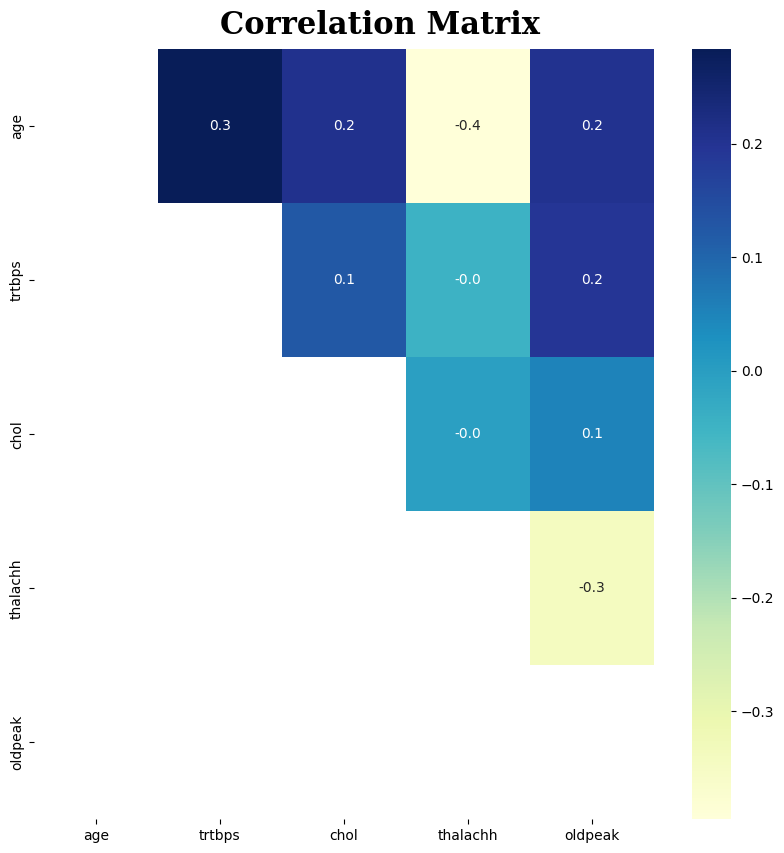

In [55]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)

ax0 = fig.add_subplot(gs[0,0])
ax0.text(1.5, -.1, "Correlation Matrix", fontsize=22, fontweight='bold', fontfamily='serif', color='#000000')
mask = np.triu(np.ones_like(df_corr)).T
sns.heatmap(df_corr, mask=mask, fmt='.1f', annot=True, cmap='YlGnBu')
mask

#### Scatterplot heatmap of df

<Figure size 1000x1000 with 0 Axes>

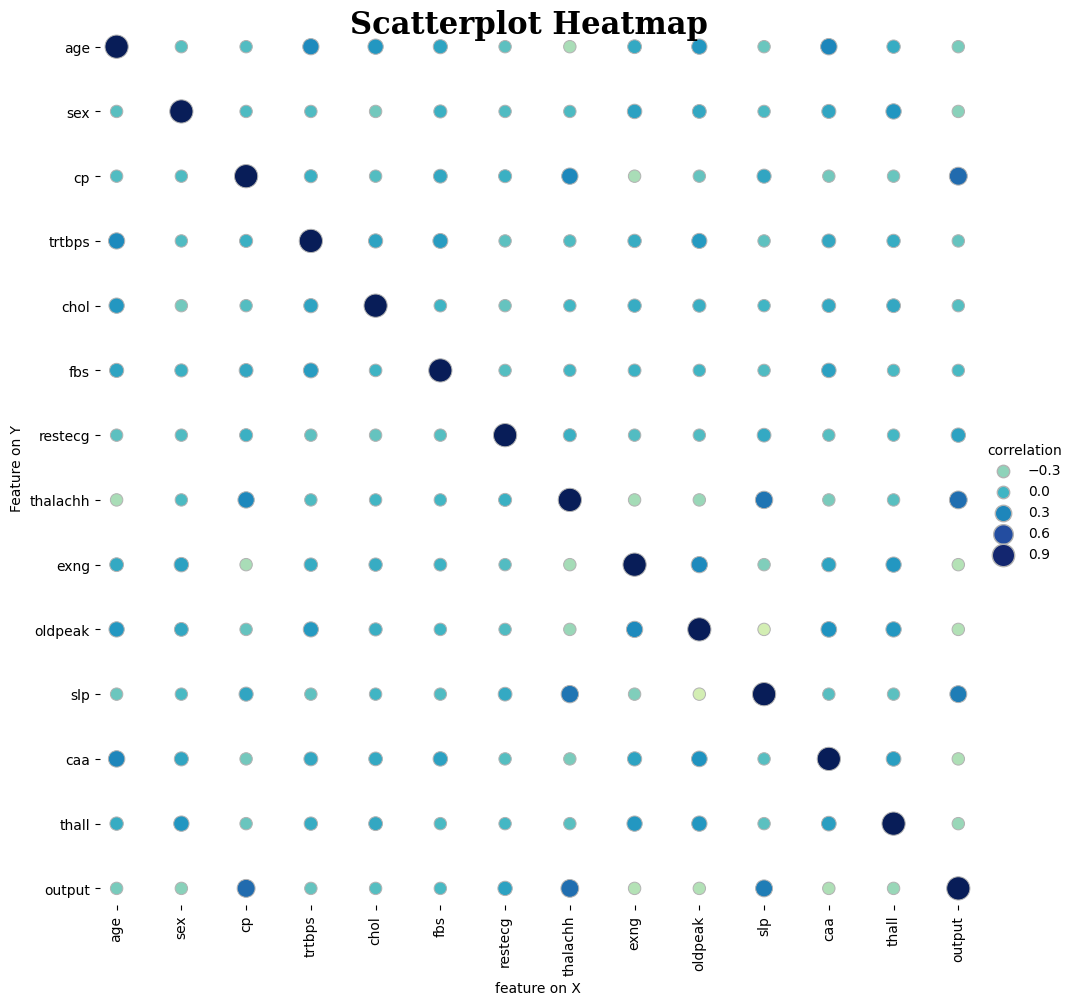

In [56]:
fig = plt.figure(figsize=(10, 10))
corr_mat = df.corr().stack().reset_index(name='correlation')
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(80, 280), size_norm=(0, 1),
)
g.fig.suptitle('Scatterplot Heatmap', fontsize=22, fontweight='bold', fontfamily='serif', color='#000000')
g.set(xlabel='feature on X', ylabel='Feature on Y', aspect='equal')
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
  label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

#### Distribution of num features according to output variable

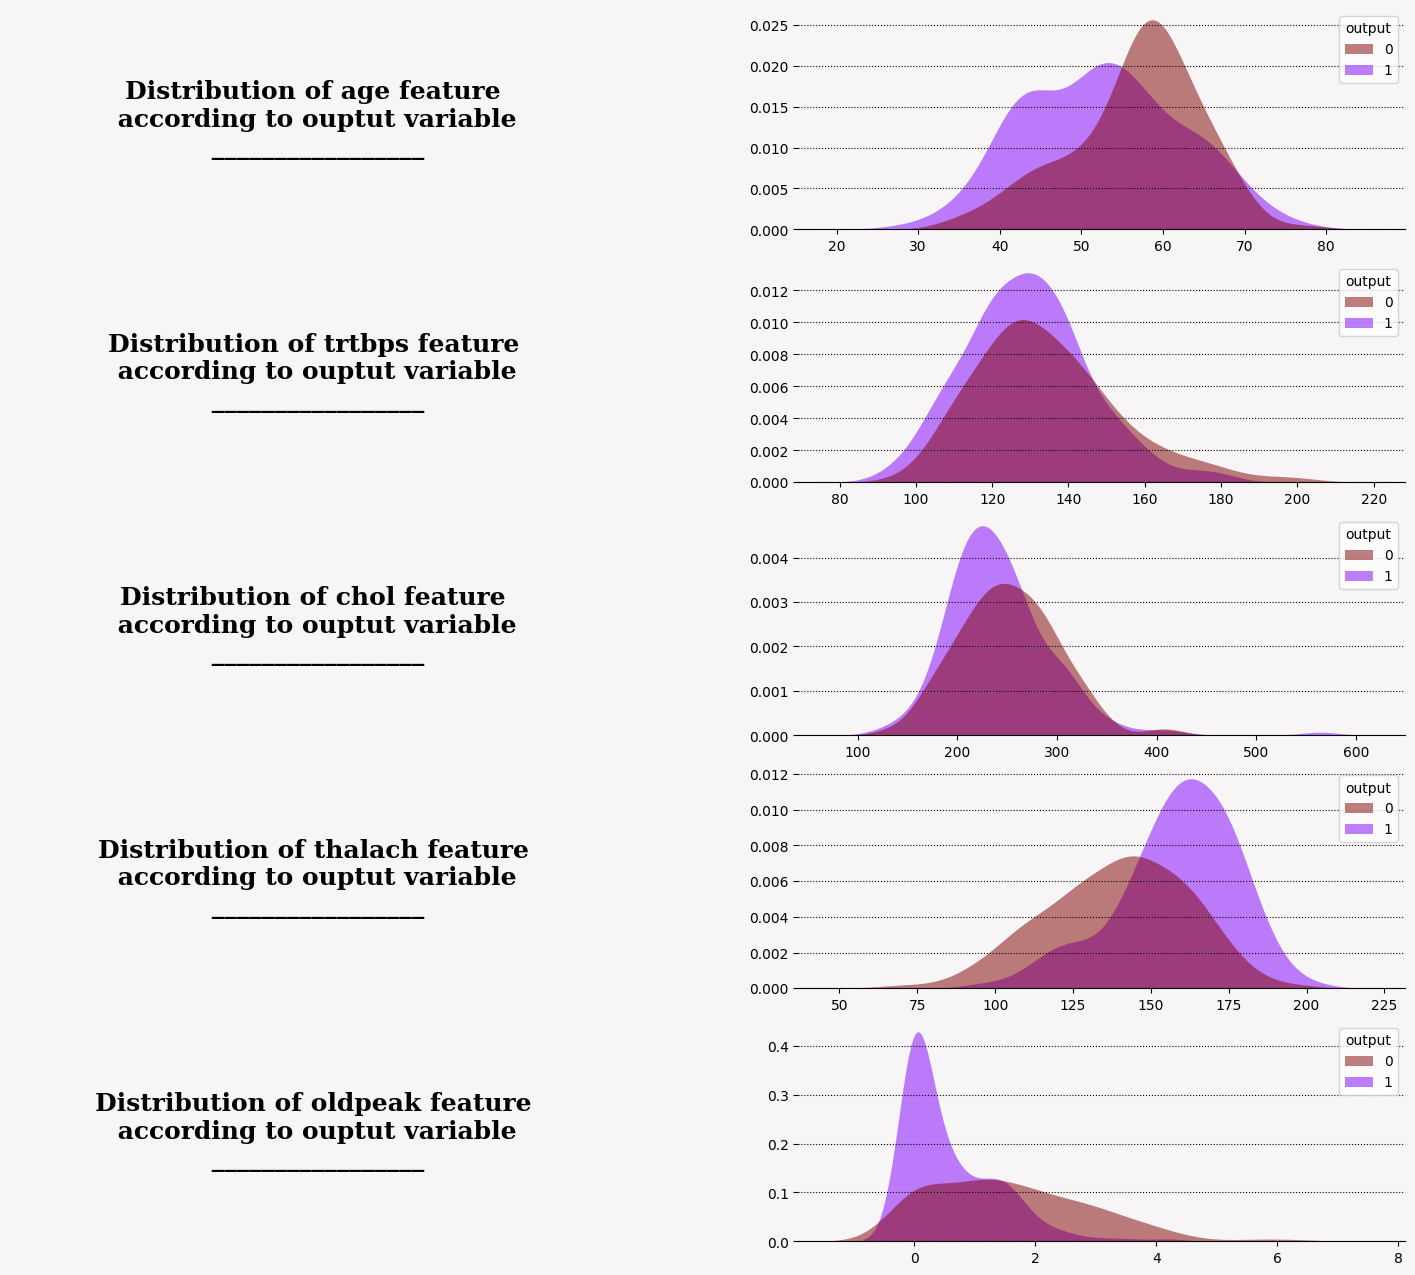

In [57]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

bg_color = '#f7f5f5'
color_palette = ['#800000', '#8000ff', '#6aac90', '#5833ff', '#da8829']
fig.patch.set_facecolor(bg_color)
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)
ax2.set_facecolor(bg_color)
ax3.set_facecolor(bg_color)
ax4.set_facecolor(bg_color)
ax5.set_facecolor(bg_color)
ax6.set_facecolor(bg_color)
ax7.set_facecolor(bg_color)
ax8.set_facecolor(bg_color)
ax9.set_facecolor(bg_color)

# Title of the age plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Distribution of age feature\n according to ouptut variable\n _________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Title of trtbps the plot
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.tick_params(left=False, bottom=False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.text(0.5,0.5,
         'Distribution of trtbps feature\n according to ouptut variable\n _________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Title of chol the plot
ax4.spines["bottom"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5,0.5,
         'Distribution of chol feature\n according to ouptut variable\n _________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Title of thalach the plot
ax6.spines["bottom"].set_visible(False)
ax6.spines["left"].set_visible(False)
ax6.spines["top"].set_visible(False)
ax6.spines["right"].set_visible(False)
ax6.tick_params(left=False, bottom=False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.text(0.5,0.5,
         'Distribution of thalach feature\n according to ouptut variable\n _________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Title of oldpeak the plot
ax8.spines["bottom"].set_visible(False)
ax8.spines["left"].set_visible(False)
ax8.spines["top"].set_visible(False)
ax8.spines["right"].set_visible(False)
ax8.tick_params(left=False, bottom=False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.text(0.5,0.5,
         'Distribution of oldpeak feature\n according to ouptut variable\n _________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
# Age
ax1.grid(color='#000000', linestyle=':', axis='y')
sns.kdeplot(ax=ax1, data=df, x='age', hue='output', palette=color_palette, fill=True, linewidth=0, alpha=0.5)
ax1.set_xlabel('')
ax1.set_ylabel('')

# trtbps
ax3.grid(color='#000000', linestyle=':', axis='y')
sns.kdeplot(ax=ax3, data=df, x='trtbps', hue='output', palette=color_palette, fill=True, linewidth=0, alpha=0.5)
ax3.set_xlabel('')
ax3.set_ylabel('')

# chol
ax5.grid(color='#000000', linestyle=':', axis='y')
sns.kdeplot(ax=ax5, data=df, x='chol', hue='output', palette=color_palette, fill=True, linewidth=0, alpha=0.5)
ax5.set_xlabel('')
ax5.set_ylabel('')

# thalachh
ax7.grid(color='#000000', linestyle=':', axis='y')
sns.kdeplot(ax=ax7, data=df, x='thalachh', hue='output', palette=color_palette, fill=True, linewidth=0, alpha=0.5)
ax7.set_xlabel('')
ax7.set_ylabel('')

# oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y')
sns.kdeplot(ax=ax9, data=df, x='oldpeak', hue='output', palette=color_palette, fill=True, linewidth=0, alpha=0.5)
ax9.set_xlabel('')
ax9.set_ylabel('')


for i in ['top', 'right', 'left']:
  ax1.spines[i].set_visible(False)
  ax3.spines[i].set_visible(False)
  ax5.spines[i].set_visible(False)
  ax7.spines[i].set_visible(False)
  ax9.spines[i].set_visible(False)

#### Some other relations that seemed intuitive

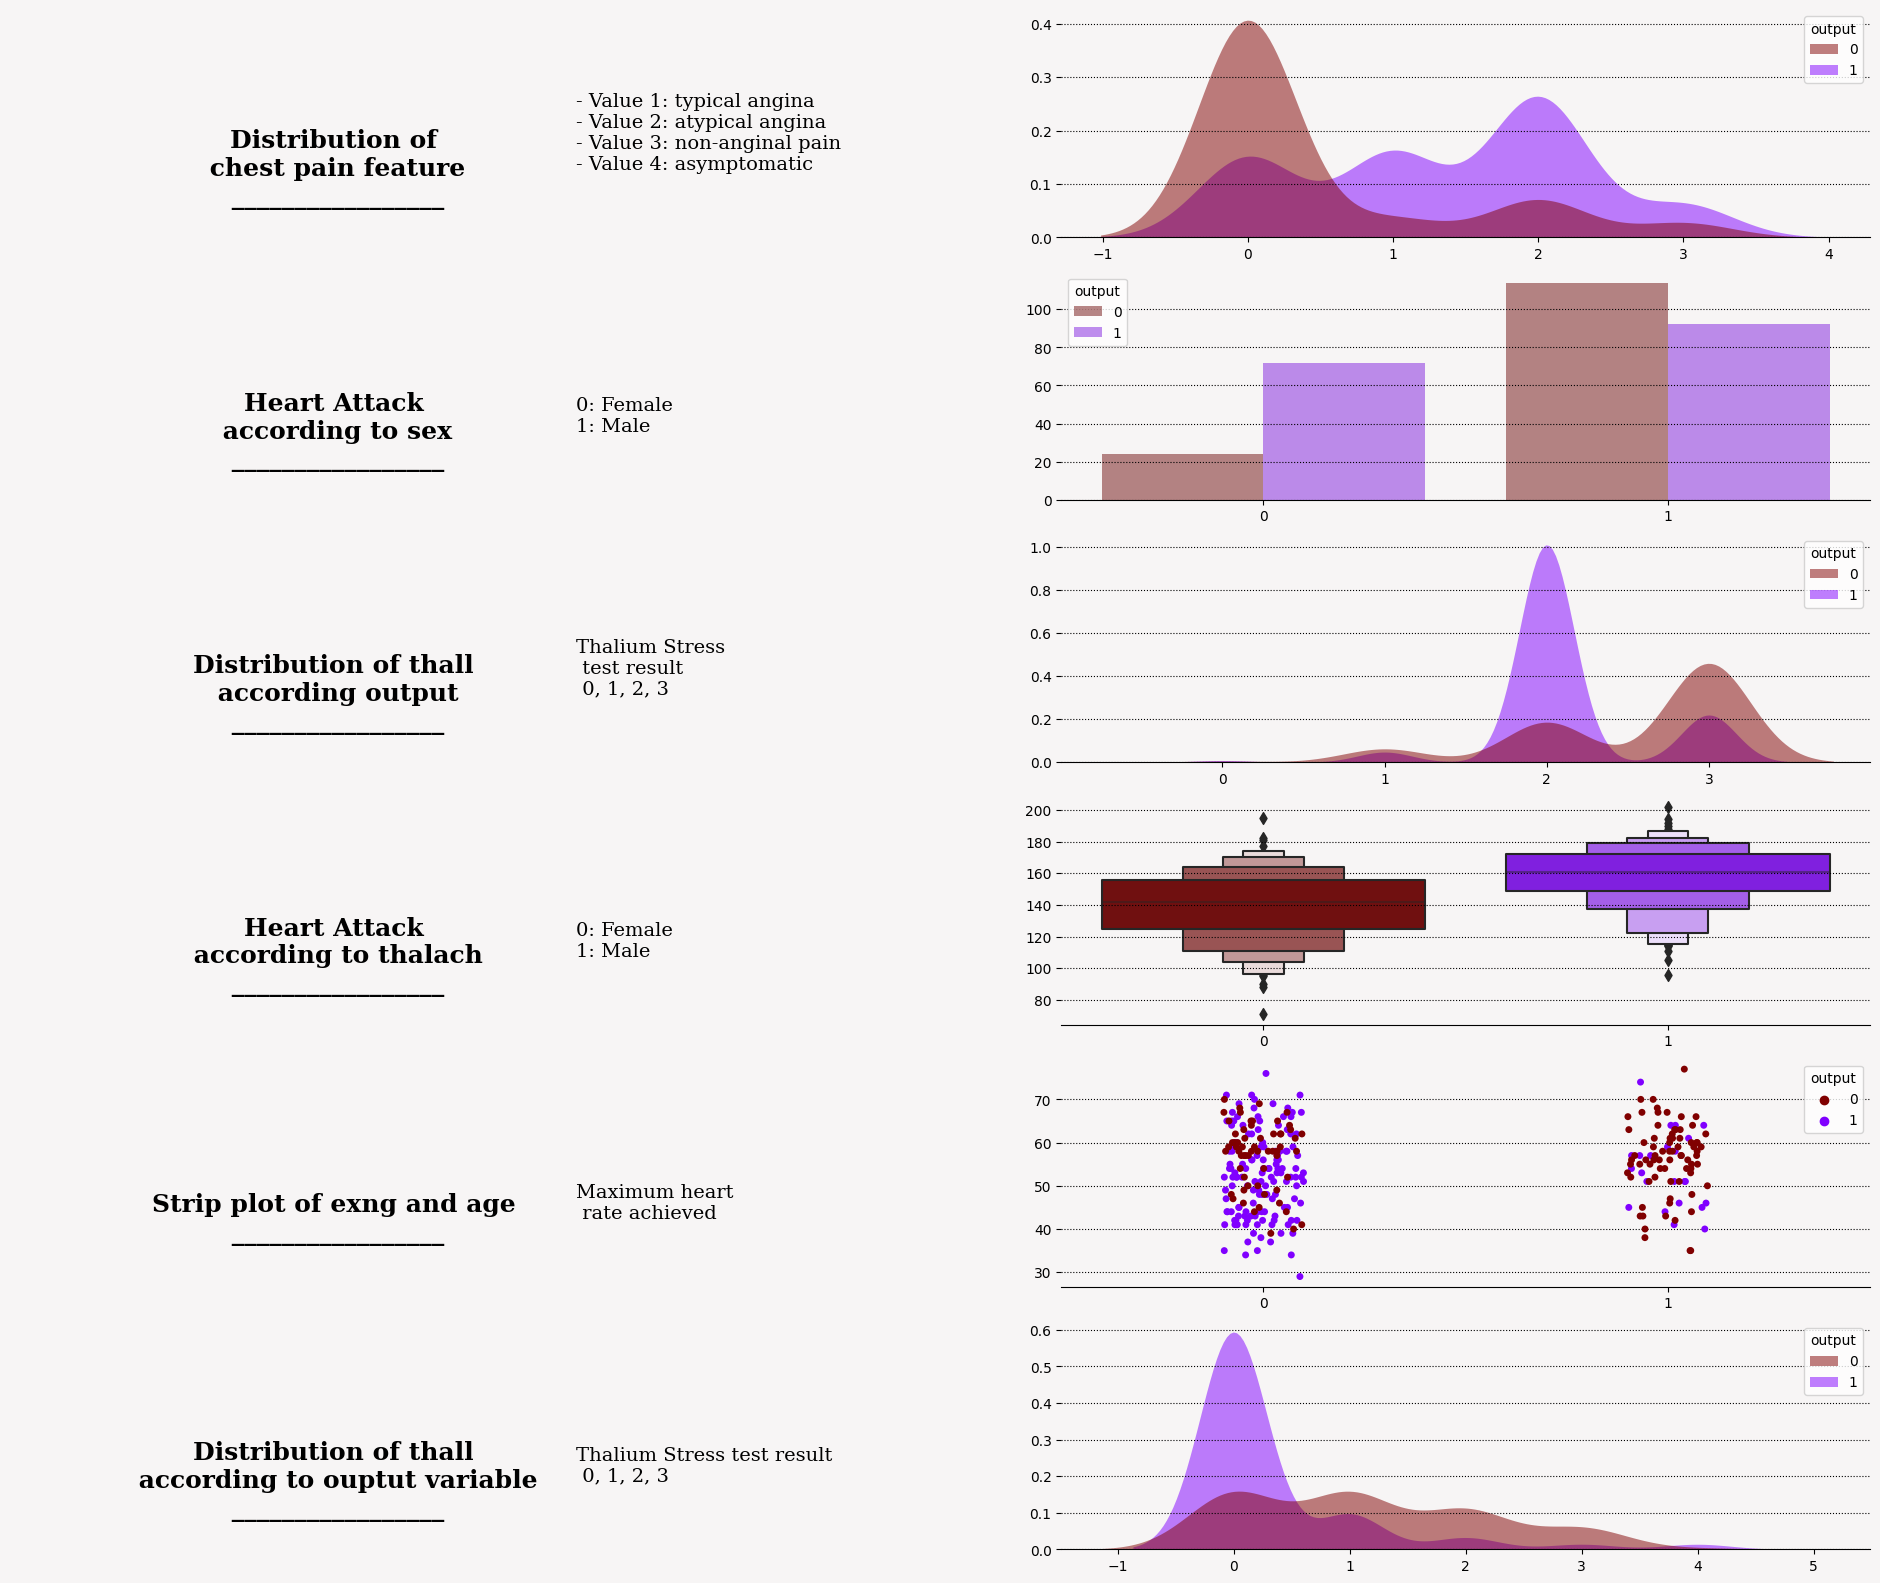

In [58]:
fig = plt.figure(figsize=(24,20))
gs = fig.add_gridspec(6, 2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

bg_color = '#f7f5f5'
color_palette = ['#800000', '#8000ff', '#6aac90', '#5833ff', '#da8829']
fig.patch.set_facecolor(bg_color)
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)
ax2.set_facecolor(bg_color)
ax3.set_facecolor(bg_color)
ax4.set_facecolor(bg_color)
ax5.set_facecolor(bg_color)
ax6.set_facecolor(bg_color)
ax7.set_facecolor(bg_color)
ax8.set_facecolor(bg_color)
ax9.set_facecolor(bg_color)
ax10.set_facecolor(bg_color)
ax11.set_facecolor(bg_color)

# Title of the age plot
ax0.spines['bottom'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.4,0.3,
         'Distribution of\n chest pain feature\n _________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax0.text(0.7,0.3,
         '- Value 1: typical angina\n- Value 2: atypical angina\n- Value 3: non-anginal pain\n- Value 4: asymptomatic',
         fontsize=14,
         fontfamily='serif',
         color="#000000")
# ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
# Title of trtbps the plot
ax2.spines['bottom'].set_visible(False)
ax2.tick_params(left=False, bottom=False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.text(0.4,0.3,
         'Heart Attack\n according to sex\n _________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax2.text(0.7,0.3,
         '0: Female\n1: Male',
        #  horizontalalignment='center',
        #  verticalalignment='center',
         fontsize=14,
         fontfamily='serif',
         color="#000000")

# Title of chol the plot
ax4.spines['bottom'].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.4,0.3,
         'Distribution of thall\n according output\n _________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax4.text(0.7,0.3,
         'Thalium Stress\n test result\n 0, 1, 2, 3',
        #  horizontalalignment='center',
        #  verticalalignment='center',
         fontsize=14,
         fontfamily='serif',
         color="#000000")

# Title of thalach the plot
ax6.spines['bottom'].set_visible(False)
ax6.tick_params(left=False, bottom=False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.text(0.4,0.3,
         'Heart Attack\n according to thalach\n _________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax6.text(0.7,0.3,
         '0: Female\n1: Male',
        #  horizontalalignment='center',
        #  verticalalignment='center',
         fontsize=14,
         fontfamily='serif',
         color="#000000")

# Title of exng and age the plot
ax8.spines['bottom'].set_visible(False)
ax8.tick_params(left=False, bottom=False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.text(0.4,0.3,
         'Strip plot of exng and age\n _________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax8.text(0.7,0.3,
         'Maximum heart\n rate achieved',
        #  horizontalalignment='center',
        #  verticalalignment='center',
         fontsize=14,
         fontfamily='serif',
         color="#000000")
# Title of thall the plot
ax10.spines['bottom'].set_visible(False)
ax10.tick_params(left=False, bottom=False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.text(0.4,0.3,
         'Distribution of thall\n according to ouptut variable\n _________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax10.text(0.7,0.3,
         'Thalium Stress test result\n 0, 1, 2, 3',
        #  horizontalalignment='center',
        #  verticalalignment='center',
         fontsize=14,
         fontfamily='serif',
         color="#000000")
# Age
ax1.grid(color='#000000', linestyle=':', axis='y')
sns.kdeplot(ax=ax1, data=df, x='cp', hue='output', palette=color_palette, fill=True, linewidth=0, alpha=0.5)
ax1.set_xlabel('')
ax1.set_ylabel('')

# sex
ax3.grid(color='#000000', linestyle=':', axis='y')
sns.countplot(ax=ax3, data=df, x='sex', hue='output', palette=color_palette, fill=True, linewidth=0, alpha=0.5)
ax3.set_xlabel('')
ax3.set_ylabel('')

# thall
ax5.grid(color='#000000', linestyle=':', axis='y')
sns.kdeplot(ax=ax5, data=df, x='thall', hue='output', palette=color_palette, fill=True, linewidth=0, alpha=0.5)
ax5.set_xlabel('')
ax5.set_ylabel('')

# thalachh
ax7.grid(color='#000000', linestyle=':', axis='y')
sns.boxenplot(ax=ax7, data=df, x='output',y='thalachh', palette=color_palette)
ax7.set_xlabel('')
ax7.set_ylabel('')

# exng and age
ax9.grid(color='#000000', linestyle=':', axis='y')
sns.stripplot(ax=ax9, data=df, x='exng',y='age',hue='output', palette=color_palette)
ax9.set_xlabel('')
ax9.set_ylabel('')

# caa
ax11.grid(color='#000000', linestyle=':', axis='y')
sns.kdeplot(ax=ax11, data=df, x='caa',hue='output', palette=color_palette, fill=True, linewidth=0, alpha=0.5)
ax11.set_xlabel('')
ax11.set_ylabel('')

for i in ['top', 'right', 'left']:
  ax0.spines[i].set_visible(False)
  ax1.spines[i].set_visible(False)
  ax2.spines[i].set_visible(False)
  ax3.spines[i].set_visible(False)
  ax4.spines[i].set_visible(False)
  ax5.spines[i].set_visible(False)
  ax6.spines[i].set_visible(False)
  ax7.spines[i].set_visible(False)
  ax8.spines[i].set_visible(False)
  ax9.spines[i].set_visible(False)
  ax10.spines[i].set_visible(False)
  ax11.spines[i].set_visible(False),

In [59]:
df.groupby('sex')['output'].sum()

sex
0    72
1    92
Name: output, dtype: int64

#### Pairplot according to target variable - one plot to rule them all

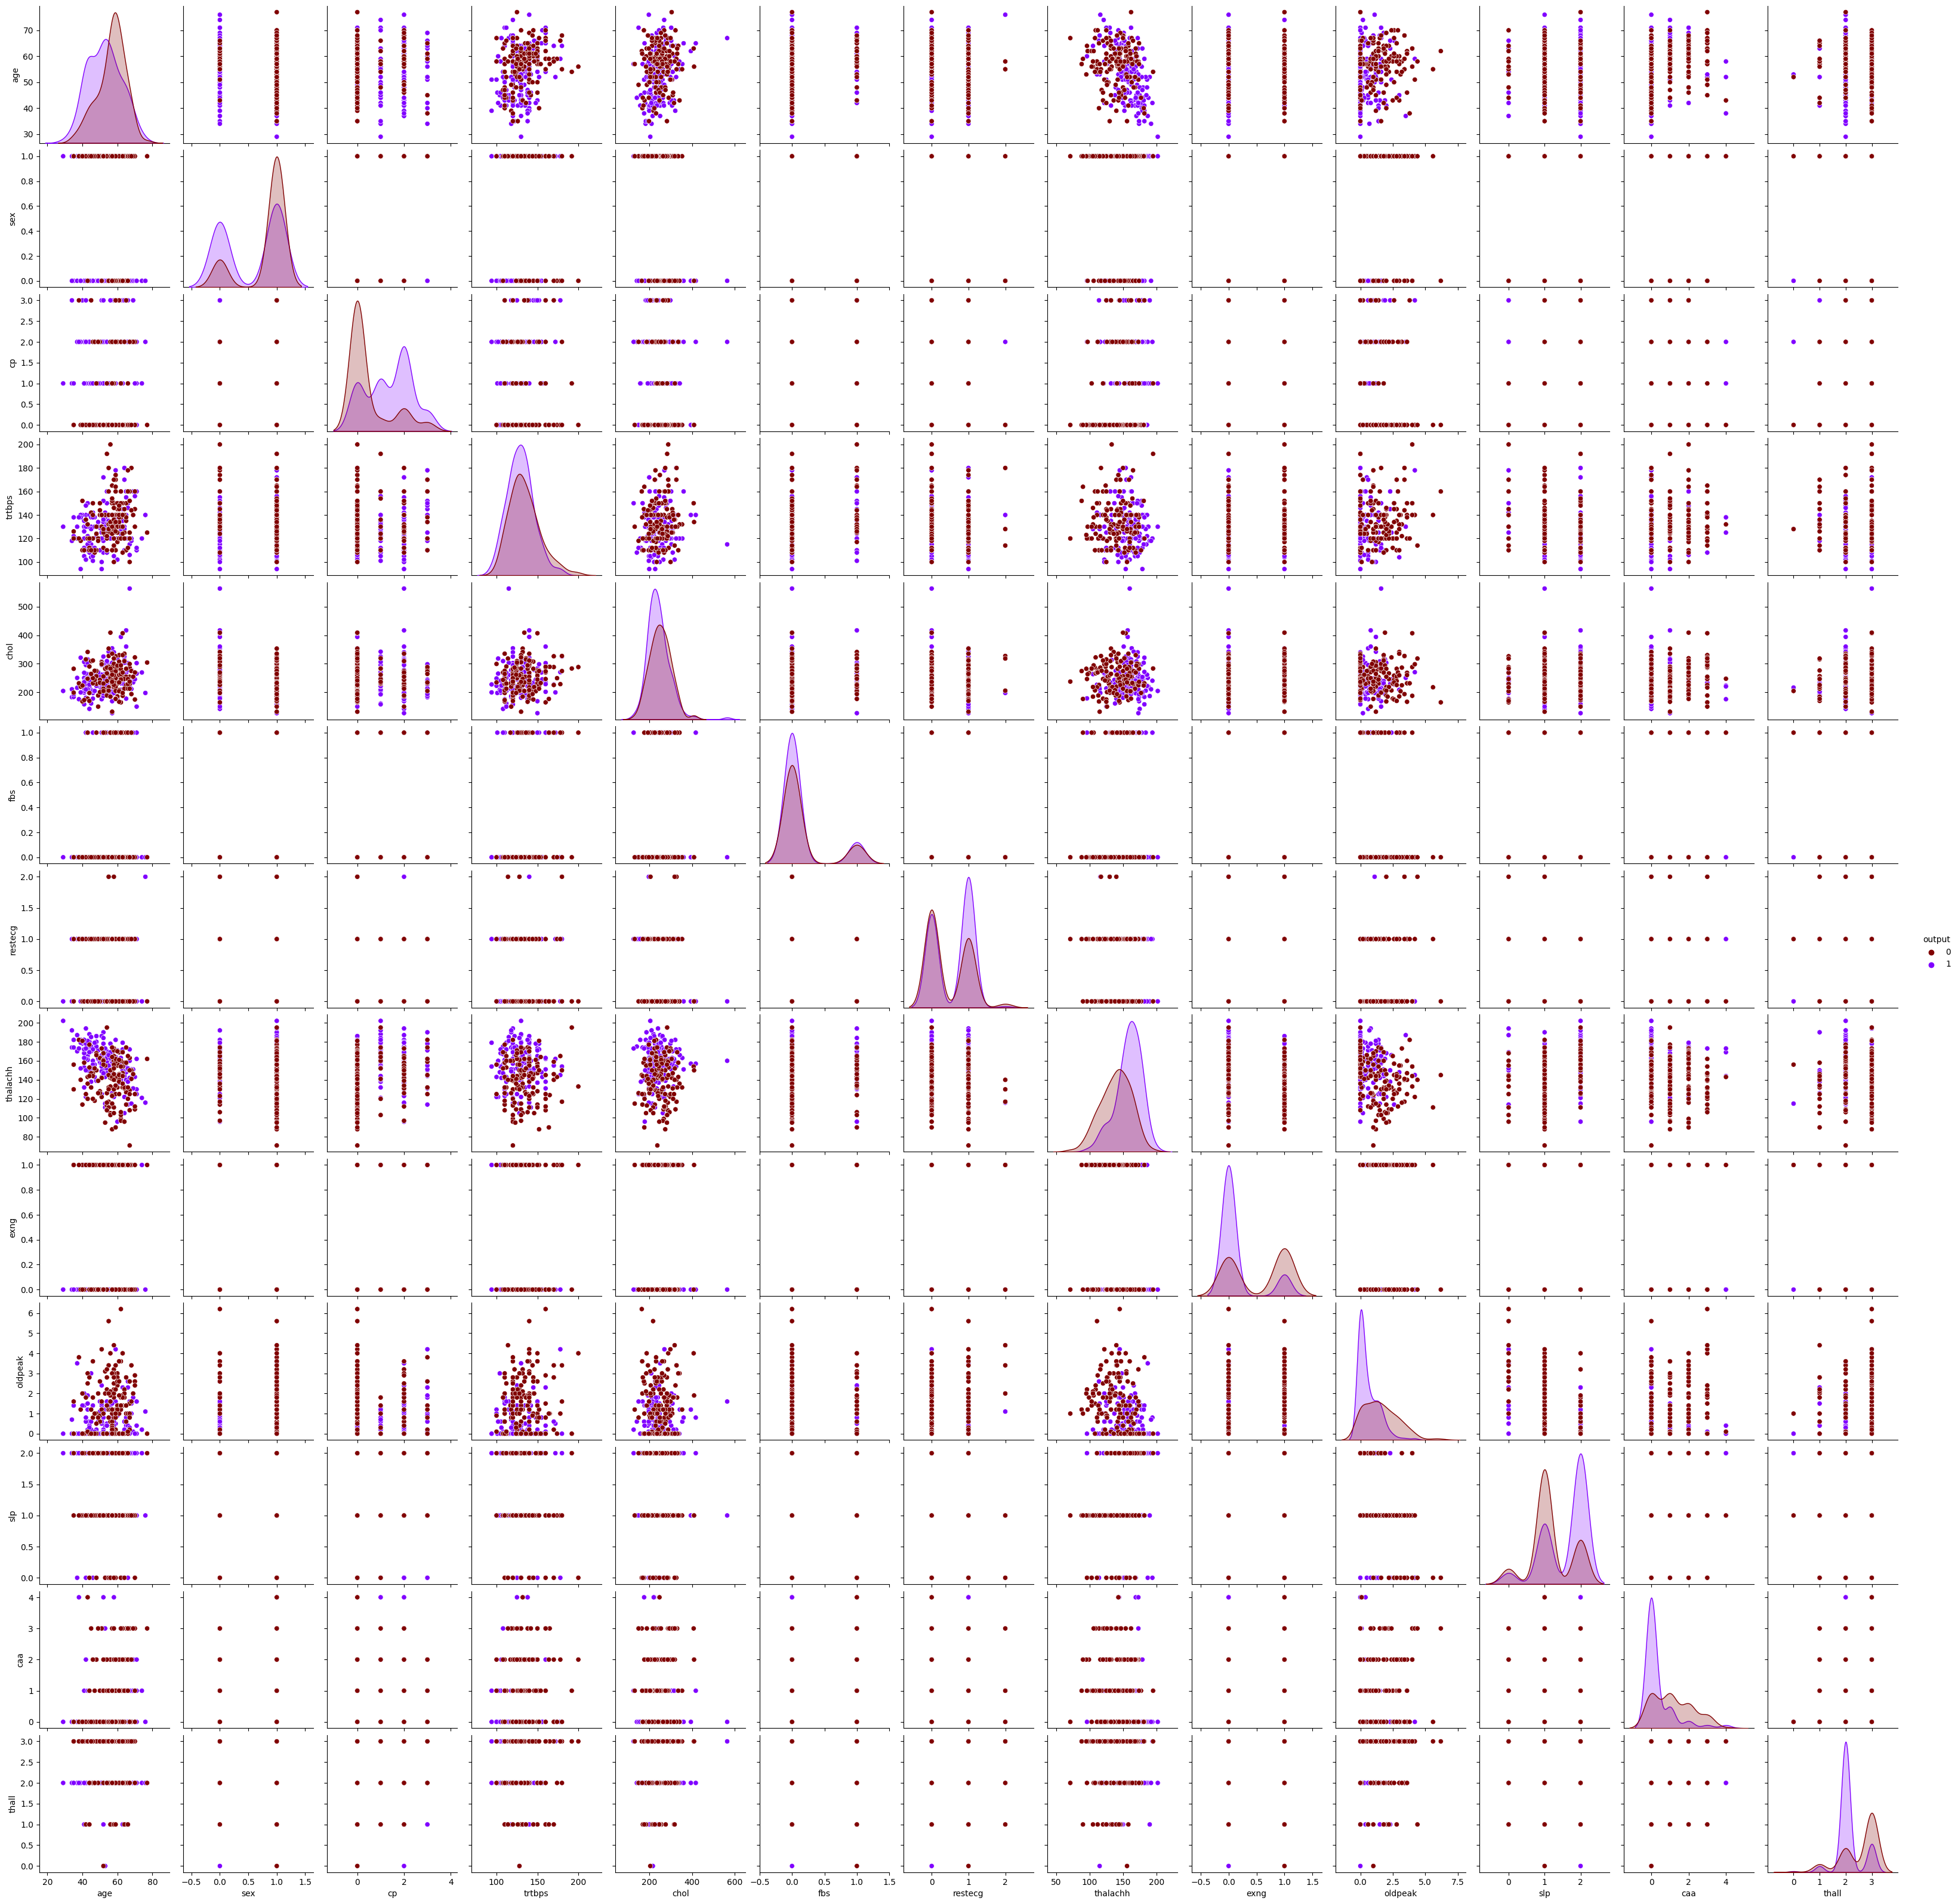

In [60]:
sns.pairplot(data=df, hue='output', palette = color_palette);

### EDA Conclusions
GENERAL
- There are no NaN values in data
- There are few outliers in all numerical data
- There is no linear correlation between numerical feature according to the heatmap
- The scatterplot heatmap matrix suggest that there is may be some correlations between `output` and `cp`, `thalach`, `thall`

NUMERICAL FEATURES
- We generally understand that elderly people are often at higher risk of having a heart attack, but according to the data, it is not. According data, the age which have the most heart attack in range of 40 to 60 years old.
- According the distribution plot of `thalach` with `output`, the people who have higher heart rate achieved, will have higher chances of heart attack.
- According the distribution plot of `oldpeak` with `output`, the people who have lower pevious peak achieved (value 0) , will have higher chances of heart attack.

CATEGORICAL FEATURE
- People with non-angina pain(value 2) that have higher chances of heart attack.
- Although the data is higher for men than for women, the percentage of heart attack in women is higher

# Preprocessing data and building model

## Scaling and Encoding Features

In [61]:
# create a copy of df
dup_df = df

In [62]:
cat_col, num_col

(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'],
 ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'])

In [63]:
x = dup_df.drop('output', axis=1)
y = dup_df['output']

In [64]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder # Using RobustScaler of dataset which have more outliers
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#Tạo các bước tiền xử lý dữ liệu
num_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=10)),
    ('scaler', RobustScaler())
])

cat_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=10)),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_col),
    ('cat', cat_transformer, cat_col)
])

x = preprocessor.fit_transform(x)

In [65]:
x.shape

(302, 30)

## Splitting train and test set

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=43)
print('The shape of X_train', x_train.shape)
print('The shape of X_test', x_test.shape)
print('The shape of Y_train', y_train.shape)
print('The shape of Y_test', y_test.shape)

The shape of X_train (241, 30)
The shape of X_test (61, 30)
The shape of Y_train (241,)
The shape of Y_test (61,)


## Lazy Prediction

In [67]:
# !pip install lazypredict

In [68]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True, ignore_warnings=True, random_state=42)

model_summary = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 37.54it/s]

[LightGBM] [Info] Number of positive: 131, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543568 -> initscore=0.174717
[LightGBM] [Info] Start training from score 0.174717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [69]:
model_summary

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 SGDClassifier                      0.92               0.92     0.92      0.92   
 NearestCentroid                    0.92               0.91     0.91      0.92   
 BernoulliNB                        0.92               0.91     0.91      0.92   
 GaussianNB                         0.92               0.91     0.91      0.92   
 ExtraTreeClassifier                0.90               0.90     0.90      0.90   
 LinearSVC                          0.90               0.89     0.89      0.90   
 LogisticRegression                 0.90               0.89     0.89      0.90   
 CalibratedClassifierCV             0.90               0.89     0.89      0.90   
 RidgeClassifierCV                  0.90               0.89     0.89      0.90   
 RidgeClassifier                    0.90               0.89     0.89      0.90   
 LinearDiscrimin

Choosing 2 model which have highest scores
- SVC
- LogisticRegression                              

## SVC

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

clf_1 = LinearSVC()

param_grid_1 = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'loss': ['hinge', 'squared_hinge'],  # Loss function (hinge or squared_hinge)
    'penalty': ['l1', 'l2'],  # Penalty term (l1 or l2)
    'dual': [True, False],  # Whether to solve the dual or primal optimization problem
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping criteria
    'max_iter': [1000, 2000, 3000]  # Maximum number of iterations
}


grid_search_1 = GridSearchCV(estimator=clf_1, param_grid=param_grid_1)
grid_search_1.fit(x_train, y_train)

best_params_1 = grid_search_1.best_params_
print('Best Hyperparameter:\n', best_params_1)

best_model_1 = grid_search_1.best_estimator_
print("Best Model:\n", best_model_1)

best_score_1 = grid_search_1.best_score_
print('Best Score:\n', best_score_1)
y_pred_1 = best_model_1.predict(x_test)

accuracy_1 = accuracy_score(y_test, y_pred_1)
print('Accuracy:\n', accuracy_1)

print('Confusion Matrix:\n',metrics.confusion_matrix(y_test,y_pred_1))
print(classification_report(y_pred_1, y_test))

Best Hyperparameter:
 {'C': 0.1, 'dual': False, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.01}
Best Model:
 LinearSVC(C=0.1, dual=False, tol=0.01)
Best Score:
 0.8298469387755102
Accuracy:
 0.9180327868852459
Confusion Matrix:
 [[23  5]
 [ 0 33]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        23
           1       1.00      0.87      0.93        38

    accuracy                           0.92        61
   macro avg       0.91      0.93      0.92        61
weighted avg       0.93      0.92      0.92        61



## Logistic Regression

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

clf_2 = LogisticRegression()

param_grid_2 = {
    'penalty': ['l1', 'l2'],             # Regularization penalty ('l1' or 'l2')
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],     # Solver for 'l1' penalty
    'max_iter': [100, 500, 1000],        # Maximum number of iterations
    'multi_class': ['ovr', 'multinomial']# Multiclass option ('ovr' or 'multinomial')
}


grid_search_2 = GridSearchCV(estimator=clf_2, param_grid=param_grid_2)
grid_search_2.fit(x_train, y_train)

best_params_2 = grid_search_2.best_params_
print('Best Hyperparameter:\n', best_params_2)

best_model_2 = grid_search_2.best_estimator_
print("Best Model:\n", best_model_2)

best_score_2 = grid_search_2.best_score_
print('Best Score:\n', best_score_2)
y_pred_2 = best_model_2.predict(x_test)

accuracy_2 = accuracy_score(y_test, y_pred_2)
print('Accuracy:\n', accuracy_2)

print('Confusion Matrix:\n',metrics.confusion_matrix(y_test,y_pred_2))
print(classification_report(y_pred_2, y_test))

Best Hyperparameter:
 {'C': 0.1, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}
Best Model:
 LogisticRegression(C=0.1, multi_class='multinomial', solver='saga')
Best Score:
 0.8383503401360544
Accuracy:
 0.9180327868852459
Confusion Matrix:
 [[23  5]
 [ 0 33]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        23
           1       1.00      0.87      0.93        38

    accuracy                           0.92        61
   macro avg       0.91      0.93      0.92        61
weighted avg       0.93      0.92      0.92        61



## CalibratedClassifierCV

In [72]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
import numpy as np

# Tạo một LinearSVC làm mô hình cơ sở (base estimator)
base_estimator_3 = LinearSVC()

# Tạo một CalibratedClassifierCV với base_estimator và phương pháp calibration (ví dụ: 'sigmoid')
calibrated_classifier_3 = CalibratedClassifierCV(base_estimator_3, method='sigmoid')

# Định nghĩa các giá trị thử nghiệm cho siêu tham số
param_grid_3 = {
    'base_estimator__C': [0.1, 1, 10],  # Tham số của base estimator
    'cv': [None, 3, 5, 10]  # Số lượng fold trong cross-validation
}


# Tạo GridSearchCV
grid_search_3 = GridSearchCV(estimator=calibrated_classifier_3, param_grid=param_grid_3)

# Thực hiện tìm kiếm trên dữ liệu huấn luyện
grid_search_3.fit(x_train, y_train)

# Lấy ra các thông tin sau khi tìm kiếm
best_params_3 = grid_search_3.best_params_
best_model_3 = grid_search_3.best_estimator_

# In ra kết quả
print("Best Parameters:", best_params_3)
print("Best Model:", best_model_3)

y_pred_3 = best_model_3.predict(x_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)
print('Accuracy:', accuracy_3)

from sklearn import metrics
from sklearn.metrics import classification_report
y_pred_3 = best_model_3.predict(x_test)

print(metrics.confusion_matrix(y_test,y_pred_3))
print(metrics.accuracy_score(y_test,y_pred_3))
print(classification_report(y_pred_3, y_test))

Best Parameters: {'base_estimator__C': 0.1, 'cv': 3}
Best Model: CalibratedClassifierCV(cv=3, estimator=LinearSVC(C=0.1))
Accuracy: 0.9180327868852459
[[23  5]
 [ 0 33]]
0.9180327868852459
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        23
           1       1.00      0.87      0.93        38

    accuracy                           0.92        61
   macro avg       0.91      0.93      0.92        61
weighted avg       0.93      0.92      0.92        61



## Random Forest

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

param_grid_3 = {
    'n_estimators': [100, 500, 1000],  # Số lượng cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của cây
}


kfold = model_selection.KFold(n_splits=10)

rf = RandomForestClassifier()
grid_search_3 = GridSearchCV(estimator=rf, param_grid=param_grid_3, cv=kfold)
grid_search_3.fit(x_train, y_train)

best_params_3 = grid_search_3.best_params_
best_model_3 = grid_search_3.best_estimator_
print('Best Parameters:')
print(best_params_3)
print('Best Model:')
print(best_model_3)

from sklearn import metrics
from sklearn.metrics import classification_report
y_pred_3 = best_model_3.predict(x_test)

print(metrics.confusion_matrix(y_test,y_pred_3))
print(metrics.accuracy_score(y_test,y_pred_3))
print(classification_report(y_pred_3, y_test))

## ROC Curve of Logistic Regression

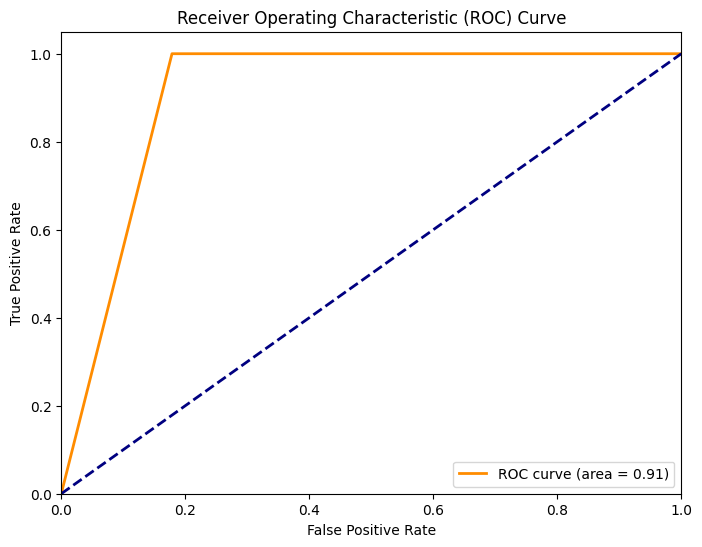

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()